In [5]:
import pandas as pd
import numpy as np

In [2]:
data_ads = pd.read_csv( "../datasets/ads/Advertising.csv" )

In [3]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len( data_ads )

200

In [6]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))

In [7]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn
0,230.1,37.8,69.2,22.1,670.896956
1,44.5,39.3,45.1,10.4,371.460206
2,17.2,45.9,69.3,9.3,613.181206
3,151.5,41.3,58.5,18.5,19.958456
4,180.8,10.8,58.4,12.9,-37.892794


In [8]:
data_ads["corr1"] = (data_ads["TV"] - np.mean( data_ads["TV"] ))**2

In [10]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1
0,230.1,37.8,69.2,22.1,670.896956,6898.548306
1,44.5,39.3,45.1,10.4,371.460206,10514.964306
2,17.2,45.9,69.3,9.3,613.181206,16859.074806
3,151.5,41.3,58.5,18.5,19.958456,19.869306
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806


In [11]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean( data_ads["Sales"] ))**2

In [12]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [17]:
corrn = sum( data_ads["corrn"] )/np.sqrt( sum(data_ads["corr1"]) * sum(data_ads["corr2"]) )

In [18]:
corrn

0.782224424861606

In [23]:
def corr_coeff( df, var1, var2 ):
    df["corrn"] = ( df[var1] - np.mean( df[var1] )) * ( df[var2] - np.mean( df[var2] ))
    df["corr1"] = (df[var1] - np.mean( df[var1] ))**2
    df["corr2"] = (df[var2] - np.mean( df[var2] ))**2
    corr_pearson = sum( df["corrn"] )/np.sqrt( sum( df["corr1"] ) * sum( df["corr2"] ) )
    
    return corr_pearson

In [30]:
corr_p = corr_coeff( data_ads, "TV", "Sales" )
corr_p # Since this value is positive, larger that 0.6 (and between -1.0 and 1.0) it means there is a 
       # correlation between TV ads and increment in sales.

0.782224424861606

In [32]:
# We load it again to see correlation results
data_ads2 = pd.read_csv( "../datasets/ads/Advertising.csv" )

In [33]:
cols = data_ads2.columns.values
for x in cols:
    for y in cols:
        print( x + ", " + y + ": " + str(corr_coeff(data_ads2, x, y)) )

TV, TV: 1.0
TV, Radio: 0.05480866446583009
TV, Newspaper: 0.056647874965056993
TV, Sales: 0.782224424861606
Radio, TV: 0.05480866446583009
Radio, Radio: 1.0
Radio, Newspaper: 0.3541037507611752
Radio, Sales: 0.5762225745710553
Newspaper, TV: 0.056647874965056993
Newspaper, Radio: 0.3541037507611752
Newspaper, Newspaper: 1.0
Newspaper, Sales: 0.22829902637616525
Sales, TV: 0.782224424861606
Sales, Radio: 0.5762225745710553
Sales, Newspaper: 0.22829902637616525
Sales, Sales: 1.0


In [35]:
import matplotlib.pyplot as plt

Text(0.5,1,'Graph TV costs vs Sales')

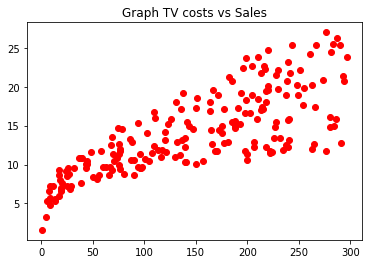

In [41]:
plt.plot( data_ads["TV"], data_ads["Sales"], "ro" )
plt.title( "Graph TV costs vs Sales" )

Text(0.5,1,'Graph Radio costs vs Sales')

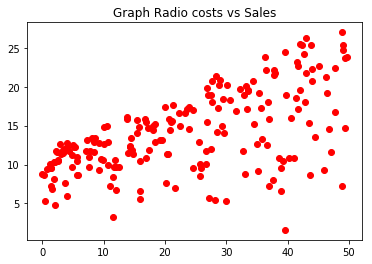

In [42]:
plt.plot( data_ads["Radio"], data_ads["Sales"], "ro" )
plt.title( "Graph Radio costs vs Sales" )

In [46]:
data_ads = pd.read_csv( "../datasets/ads/Advertising.csv" )
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


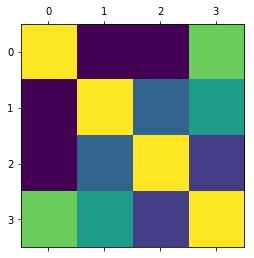

In [48]:
plt.matshow( data_ads.corr() )